In [1]:
%matplotlib inline

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from KNN import KNNClassifier


# KNN

The model k Nearest Neighbors is applied and its implementation is in the file 'KNN.py'

In [2]:
# Retrieving the DataFrame
X_train_small = pd.read_csv('X_train_small.csv')
y_train_small = pd.read_csv('y_train_small.csv')

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
# Printing their shape
print("X_train_small shape:", X_train_small.shape)
print("y_train_small shape:", y_train_small.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_small shape: (15000, 719)
y_train_small shape: (15000, 1)
X_train shape: (60000, 719)
y_train shape: (60000, 1)
X_test shape: (10000, 719)
y_test shape: (10000, 1)


In [4]:

def cv10_knn(X_train_small, X_train, X_test, y_train_small, y_train, y_test):
    
    # ------------------------------------------------------------------
    
    # Creation of the model
    model = KNNClassifier()
    properties = {'k': [2, 3, 4, 5, 6]}
    
    # Applying the cross validation technique over the model and finding the best hyper-parameter value
    tuned_model = GridSearchCV(model, properties, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = 4)
    print("Fitting with GSCV...")
    tuned_model.fit(X_train_small, y_train_small)
    
    best_accuracy = tuned_model.best_score_
    best_k = tuned_model.best_params_
    result = pd.DataFrame(tuned_model.cv_results_)
        
    # ------------------------------------------------------------------
    
    # Fitting the best model on the whole training set
    best_model = tuned_model.best_estimator_
    print("Fitting ...")
    start_fit = time.time() 
    best_model.fit(X_train, y_train)
    end_fit = time.time()
    time_fit = end_fit - start_fit

    # Predicting on the test set
    print("Predicting ...")
    start_predict = time.time()
    y_pred_test = best_model.predict(X_test)
    end_predict = time.time()
    test_acc = accuracy_score(y_true = y_test, y_pred = y_pred_test)    
    time_predict = end_predict - start_predict
    
    time_count = [time_fit, time_predict]

    return best_k, best_accuracy, test_acc, y_pred_test, result, time_count

In [5]:
best_k, best_accuracy, test_acc, y_pred_test, results, time_count = cv10_knn(X_train_small, X_train, X_test, y_train_small.to_numpy().ravel(), y_train.to_numpy().ravel(), y_test.to_numpy().ravel())

Fitting with GSCV...
Fitting ...
Predicting ...


In [6]:
print(results[["param_k", "mean_test_score"]])
print("Best number of estimators: ", best_k)
print("Best accuracy with the best number of estimators: ", best_accuracy)
print("Test accuracy with the best number of estimators: ", test_acc)
print("Time for the fit phase: ", time_count[0])
print("Time for the predict phase: ", time_count[1])

  param_k  mean_test_score
0       2         0.955667
1       3         0.957533
2       4         0.959067
3       5         0.956067
4       6         0.957267
Best number of estimators:  {'k': 4}
Best accuracy with the best number of estimators:  0.9590666666666667
Test accuracy with the best number of estimators:  0.9757
Time for the fit phase:  0.0
Time for the predict phase:  2534.4813838005066


<Axes: >

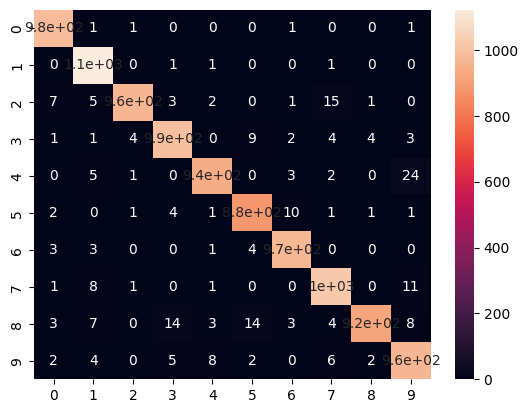

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True)